<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.4.0


### GitHub + Colab

In [ ]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 15), reused 42 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
#GitHub Colab directory
# Directories for files
map_file = '/content/DL_Assg2/mapping.csv'
dataset_file = '/content/DL_Assg2/dataset.csv'

In [ ]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [ ]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv(map_file, delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [ ]:
# load the dataset
dat = pd.read_csv(dataset_file, delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

dat.head()

,TEXT,Label
0,Been friends since 7th grade. Look at us now w...,0
1,This is what it looks like when someone loves ...,1
2,RT @user this white family was invited to a Bl...,1
3,"Westenders @user #LAZzNation @ Weston, Toronto\n",2
4,Maxwell heads home @ Summa Akron City Hospital\n,0


In [ ]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [ ]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

def vectorize_sequences(sequences, dimension=5):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

X = pad_sequences(sequences, maxlen=max_len)
y = vectorize_sequences(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546, 5)


### 1.3 Data Sampling

In [ ]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model

### Model #1 (LSTM)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 8)             80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
__________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
851/851 [==============================] - 35s 41ms/step - loss: 1.4318 - acc: 0.4225 - val_loss: 1.4235 - val_acc: 0.4311
Epoch 2/50
851/851 [==============================] - 35s 41ms/step - loss: 1.4265 - acc: 0.4225 - val_loss: 1.4191 - val_acc: 0.4311
Epoch 3/50
851/851 [==============================] - 35s 41ms/step - loss: 1.3989 - acc: 0.4242 - val_loss: 1.3517 - val_acc: 0.4412
Epoch 4/50
851/851 [==============================] - 35s 42ms/step - loss: 1.3221 - acc: 0.4430 - val_loss: 1.2911 - val_acc: 0.4558
Epoch 5/50
851/851 [==============================] - 35s 42ms/step - loss: 1.2658 - acc: 0.4589 - val_loss: 1.2426 - val_acc: 0.4664
Epoch 6/50
851/851 [==============================] - 36s 42ms/step - loss: 1.2224 - acc: 0.4751 - val_loss: 1.2051 - val_acc: 0.4808
Epoch 7/50
851/851 [==============================] - 36s 42ms/step - loss: 1.1915 - acc: 0.4849 - val_loss: 1.1828 - val_acc: 0.4894
Epoch 8/50
851/851 [==============================] - 36s 42ms

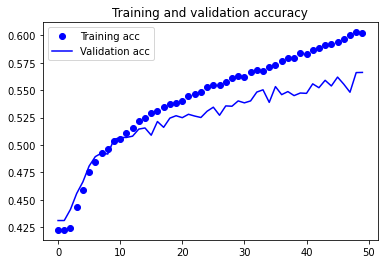

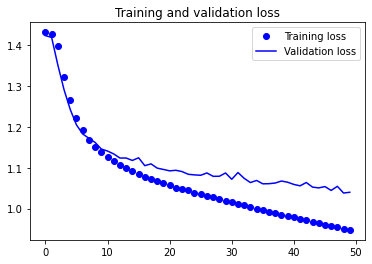

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_15.h5')
model.save('text_model_15.h5')

### Model #2 (gLove twitter)

In [ ]:
glove_dir = '/content/drive/My Drive/Colab Notebooks/DL_Assg2_pynb/'

embeddings_index = {}
f = open(glove_dir + 'glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

Found 1193514 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49349999  0.35698     0.66068    ...  0.17705999 -0.53694999
  -0.29699001]
 [ 0.42765999  0.24532001 -0.84921998 ... -0.28922999 -0.20868
  -0.68928999]
 ...
 [ 0.12049     0.32422999 -0.47606    ... -0.58858001 -0.58521998
   0.30304   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.19525     0.29508999 -0.42467999 ...  0.10091     0.20915
  -0.49527001]]


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_18 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)             

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 34, 200)           2000000   
_________________________________________________________________
flatten_18 (Flatten)         (None, 6800)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              6964224   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)             

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-2, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/500
213/213 [==============================] - 2s 10ms/step - loss: 3.7792 - acc: 0.4185 - val_loss: 3.5823 - val_acc: 0.4465
Epoch 2/500
213/213 [==============================] - 2s 8ms/step - loss: 3.4621 - acc: 0.4754 - val_loss: 3.2827 - val_acc: 0.5269
Epoch 3/500
213/213 [==============================] - 2s 8ms/step - loss: 3.2047 - acc: 0.5141 - val_loss: 3.0585 - val_acc: 0.5457
Epoch 4/500
213/213 [==============================] - 2s 8ms/step - loss: 2.9782 - acc: 0.5457 - val_loss: 2.8847 - val_acc: 0.5668
Epoch 5/500
213/213 [==============================] - 2s 8ms/step - loss: 2.7803 - acc: 0.5697 - val_loss: 2.7027 - val_acc: 0.5770
Epoch 6/500
213/213 [==============================] - 2s 8ms/step - loss: 2.6003 - acc: 0.5909 - val_loss: 2.5548 - val_acc: 0.5862
Epoch 7/500
213/213 [==============================] - 2s 8ms/step - loss: 2.4362 - acc: 0.6093 - val_loss: 2.4255 - val_acc: 0.5991
Epoch 8/500
213/213 [==============================] - 2s 8ms/step -

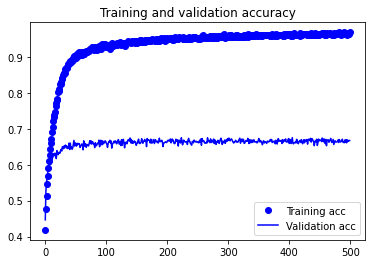

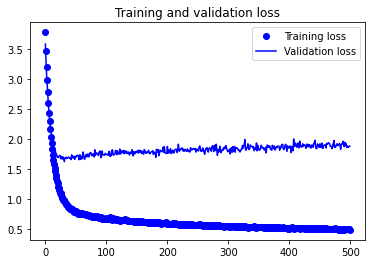

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_gLove200d_4.h5')
model.save('text_model_gLove200d_4.h5')

## Step 3 – Evaluate the Model using Testing Data 

In [ ]:
from tensorflow.keras import models

In [ ]:
# Model #1 (replicate where necessary for other models)
from tensorflow.keras import models
#model.load_weights('text_model_1.h5')

model1 = models.load_model(model_path+'text_model_15.h5')
evaluation1 = model1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", evaluation1)

67/67 [==============================] - 157s 2s/step - loss: 1.0516 - acc: 0.5539
test loss, test acc: [1.051558256149292, 0.5539365410804749]


In [ ]:
# Model #2 (replicate where necessary for other models)
#model.load_weights('text_model_1.h5')

model2 = models.load_model(model_path+'text_model_gLove200d_4.h5')
evaluation2 = model2.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", evaluation2)

67/67 [==============================] - 3s 46ms/step - loss: 1.9329 - acc: 0.6517
test loss, test acc: [1.9329396486282349, 0.6517038941383362]


In [ ]:
# Save the Best Model
model2.save(model_path+'text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [ ]:
#model.load_weights('text_model_best.h5')

model_best = models.load_model(model_path+'text_model_best.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

LOL


In [ ]:
# convert the user input into numeric tensor
import pandas as pd
def prediction(model, text_array, items_list):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = items_list)
    result = items_list[np.argmax(prob)]
    return pro_df, result

sequences = tokenizer.texts_to_sequences(text_input)
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# show the model output using predict function
prediction(model_best, data, emoji_dictionary)

(          0         1         2         3         4
 0  0.000018  0.999931  0.000003  0.000021  0.000027, '😂')

In [ ]:
ls = ["LOL", "Photography", "love", "awesome", "lit", "crazy", "fave", "ease", "mind", "lake", "wedding", "appear", "shot"]

for i in range(len(ls)):
  text_input = np.array([ls[i]])
  print(ls[i])
  sequences = tokenizer.texts_to_sequences(text_input)
  data = pad_sequences(sequences, maxlen=max_len)
  print(prediction(model_best, data, emoji_dictionary))

LOL
(          0         1         2         3         4
0  0.000018  0.999931  0.000003  0.000021  0.000027, '😂')
Photography
(          0         1         2         3         4
0  0.987464  0.000714  0.008722  0.000328  0.002773, '😍')
love
(          0         1         2         3         4
0  0.786352  0.023052  0.005186  0.003824  0.181586, '😍')
awesome
(          0         1         2         3         4
0  0.544734  0.071298  0.013678  0.351976  0.018314, '😍')
lit
(              0             1             2    3             4
0  1.514475e-08  2.116505e-07  5.213982e-08  1.0  1.303962e-08, '🔥')
crazy
(          0         1         2         3       4
0  0.004589  0.985264  0.000765  0.007782  0.0016, '😂')
fave
(          0         1         2        3         4
0  0.947227  0.037206  0.001242  0.00308  0.011245, '😍')
ease
(          0         1         2         3         4
0  0.181535  0.735612  0.008208  0.045256  0.029389, '😂')
mind
(          0         1         2         3